In [1]:
import numpy as np
import pandas as pd
from sklearn import naive_bayes, datasets, preprocessing, model_selection
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

In [38]:
rng = np.random.RandomState(6)
X, y = datasets.make_classification(n_features=2,
                                    n_redundant=0, #冗余特征
                                    n_informative=2, #信息的重复量
                                    random_state=66, 
                                    n_clusters_per_class=1)
# 人为添加噪声数据
X += 2 * rng.uniform(size=X.shape)
# 线性可分数据
linear_separable = (X, y)

0.8
0.9666666666666667
0.8333333333333334


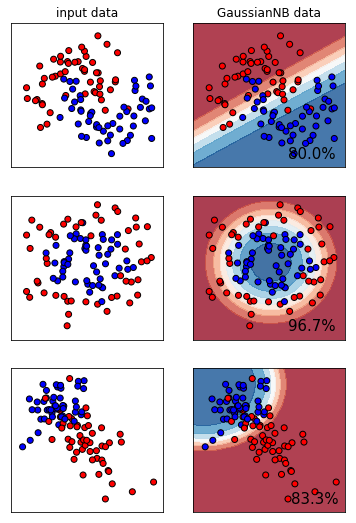

In [40]:
# 探索高斯朴素贝叶斯在月亮型数据 环形 二分类型的分类效果
names = ['MultinomialNB', 'GaussianNB', 'BernoulliNB', 'ComplementNB']
classifiers = [
    naive_bayes.MultinomialNB(), #多项式朴素贝叶斯
    naive_bayes.GaussianNB(), #高斯朴素贝叶斯
    naive_bayes.BernoulliNB(), #伯努利朴素贝叶斯
    naive_bayes.ComplementNB() #补集朴素贝叶斯
]
data_arr = [
    datasets.make_moons(noise=0.3, random_state=0), # 月亮数据
    datasets.make_circles(noise=0.2, factor=0.5, random_state=1), # 环形数据
    linear_separable,  # 二分类数据
]
figure = plt.figure(figsize=(6, 9))
i = 1
for index, data in enumerate(data_arr):
    X, y = data
    X = preprocessing.StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=66)
    x1_min, x1_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    x2_min, x2_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    # 接下来生成网格坐标
    array1, array2 = np.meshgrid(np.arange(x1_min, x1_max, 0.2), np.arange(x2_min, x2_max, 0.2))
    ax = plt.subplot(len(data_arr), 2, i)
    if index == 0:
        ax.set_title('input data')
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors='k')
    ax.set_xlim(array1.min(), array1.max())
    ax.set_ylim(array2.min(), array2.max())
    ax.set_xticks(())
    ax.set_yticks(())
    
    # 绘画第二列数据
    i+=1
    ax = plt.subplot(len(data_arr), 2, i)
    clf = naive_bayes.GaussianNB().fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    Z = clf.predict_proba(np.c_[array1.ravel(), array2.ravel()])[:, 1].reshape(array1.shape)
    plt.contourf(array1, array2, Z, cmap=cm, alpha=0.8)
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors='k')
    if index == 0:
        ax.set_title('GaussianNB data')
    ax.set_xlim(array1.min(), array1.max())
    ax.set_ylim(array2.min(), array2.max())
    ax.set_xticks(())
    ax.set_yticks(())
    print(score)
    ax.text(array1.max()-0.3, # 显示文本的横坐标
            array2.min()+0.3,  # 显示文本的纵坐标
            ('{:.1f}%'.format(score*100)), # 显示的文本
            size=15,
            horizontalalignment='right',
           )
    i+=1
# plt.tight_layout()
plt.show()
    

In [27]:
round(0.8666 * 100, 1)

86.7

In [31]:
'%.2f' % (3.141592653589793,)


'3.14'

In [ ]:
# 高斯朴素贝叶斯的拟合效果和运算速度
